<a href="https://colab.research.google.com/github/Ishank2301/Pratise-ML-Algorithums/blob/main/Regresion(Random_Tree_%26_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selection of Best Regression model:

# Step-1 Importing the libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np

# Step-2 Importing the dataset




In [3]:
df = pd.read_csv("nyc_housing_base.csv") # Load the Dataset


# Step-3 Let's perform some cleaning on the data.





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34394 entries, 0 to 34393
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   borough_x     34394 non-null  int64  
 1   block         34394 non-null  int64  
 2   lot           34394 non-null  int64  
 3   sale_price    34394 non-null  int64  
 4   zip_code      34378 non-null  float64
 5   borough_y     34394 non-null  object 
 6   yearbuilt     34394 non-null  float64
 7   lotarea       34394 non-null  float64
 8   bldgarea      34394 non-null  float64
 9   resarea       34251 non-null  float64
 10  comarea       34251 non-null  float64
 11  unitsres      34394 non-null  float64
 12  unitstotal    34394 non-null  float64
 13  numfloors     34367 non-null  float64
 14  latitude      34388 non-null  float64
 15  longitude     34388 non-null  float64
 16  landuse       34392 non-null  float64
 17  bldgclass     34394 non-null  object 
 18  building_age  34394 non-nu

In [5]:
df.describe()


,borough_x,block,lot,sale_price,zip_code,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,building_age
count,34394.000000,34394.000000,34394.000000,3.439400e+04,34378.000000,34394.000000,3.439400e+04,3.439400e+04,3.425100e+04,3.425100e+04,34394.000000,34394.000000,34367.000000,34388.000000,34388.000000,34392.000000,34394.000000
mean,3.073036,4561.532855,59.994650,1.171850e+06,10866.210629,1941.038059,5.253581e+04,6.273635e+04,5.587184e+04,6.849763e+03,51.744723,52.338547,4.223823,40.707347,-73.919767,1.932775,83.961941
std,1.287328,3609.966826,136.305261,1.240896e+06,557.840912,28.995885,5.035368e+05,2.714281e+05,2.115919e+05,6.971181e+04,173.490394,175.070304,5.224192,0.082175,0.108357,1.314345,28.995885
min,1.000000,1.000000,1.000000,1.186300e+04,10001.000000,1800.000000,2.970000e+02,2.000000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,40.500291,-74.253599,1.000000,0.000000
25%,2.000000,1432.000000,14.000000,5.129002e+05,10308.000000,1920.000000,2.090000e+03,1.617000e+03,1.356000e+03,0.000000e+00,1.000000,1.000000,2.000000,40.640050,-73.978270,1.000000,65.000000
50%,3.000000,3848.000000,33.000000,8.250000e+05,11210.000000,1935.000000,3.085000e+03,2.496000e+03,2.120000e+03,0.000000e+00,2.000000,2.000000,2.000000,40.705893,-73.915228,1.000000,90.000000
75%,4.000000,6677.000000,59.000000,1.300000e+06,11364.000000,1960.000000,7.500000e+03,1.450000e+04,9.624500e+03,0.000000e+00,13.000000,15.000000,4.000000,40.759604,-73.846155,3.000000,105.000000
max,5.000000,16350.000000,3635.000000,9.995000e+06,11697.000000,2025.000000,2.225160e+07,3.750565e+06,2.690565e+06,1.100000e+06,1887.000000,1906.000000,54.000000,40.912745,-73.700488,11.000000,225.000000


In [6]:
df.head(10)


,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
0,1,400,11,280000,10009.0,MN,1900.0,2404.0,6875.0,6875.0,0.0,18.0,18.0,5.0,40.724415,-73.983891,2.0,C6,125.0
1,1,402,36,2000000,10009.0,MN,1900.0,1919.0,7810.0,6810.0,1000.0,8.0,10.0,5.0,40.724975,-73.981535,2.0,C4,125.0
2,1,402,60,3400000,10009.0,MN,1920.0,2150.0,6152.0,5352.0,800.0,8.0,9.0,5.0,40.725346,-73.983112,4.0,C7,105.0
3,1,404,42,4000000,10009.0,MN,1855.0,2369.0,6990.0,6990.0,0.0,10.0,10.0,5.0,40.727398,-73.980600,2.0,C4,170.0
4,1,372,55,655000,10009.0,MN,1920.0,5298.0,17990.0,17990.0,0.0,20.0,20.0,5.0,40.720621,-73.979534,2.0,C6,105.0
5,1,373,46,470000,10009.0,SI,1944.0,3132.0,2440.0,440.0,2000.0,1.0,2.0,2.0,40.613137,-74.125878,4.0,K4,81.0
6,1,373,46,474000,10009.0,SI,1944.0,3132.0,2440.0,440.0,2000.0,1.0,2.0,2.0,40.613137,-74.125878,4.0,K4,81.0
7,1,374,8,1050000,10009.0,BK,1899.0,1400.0,2700.0,2700.0,0.0,3.0,3.0,3.0,40.678077,-73.999960,2.0,C0,126.0
8,1,375,30,330000,10009.0,MN,1902.0,3082.0,17556.0,17556.0,0.0,19.0,19.0,6.0,40.722625,-73.977788,2.0,C6,123.0
9,1,376,5,425000,10009.0,MN,1900.0,3772.0,15086.0,14086.0,1000.0,22.0,24.0,6.0,40.723737,-73.978783,2.0,C6,125.0


In [7]:
df.isnull().sum()


,0
borough_x,0
block,0
lot,0
sale_price,0
zip_code,16
borough_y,0
yearbuilt,0
lotarea,0
bldgarea,0
resarea,143


Divide dependant variable and independant variable:

In [8]:
X = df.drop(columns=['sale_price'])
y = df['sale_price']

# STEP 5— Target Encoding for Handling Categorical variables:
#  Implementing SimpleImputer and Selecting Pipeline For Decision Tree:





In [9]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# The dataframe 'X' has already been globally filled with X.fillna(0)
# However, to make the pipeline robust, we'll ensure imputation is part of it.

# Define categorical and numerical features for the ColumnTransformer
categorical_features = ["borough_y", "bldgclass"]
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Ensure X_train and y_train are correctly split from the preprocessed X
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", SimpleImputer(strategy='mean'), numerical_features) # Impute numerical features
    ],
    remainder="drop" # Drop any other columns not explicitly handled
)

pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", DecisionTreeRegressor(random_state=42))
    ]
)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['borough_y', 'bldgclass']),
                                                 ('num', SimpleImputer(),
                                                  ['borough_x', 'block', 'lot',
                                                   'zip_code', 'yearbuilt',
                                                   'lotarea', 'bldgarea',
                                                   'resarea', 'comarea',
                                                   'unitsres', 'unitstotal',
                                                   'numfloors', 'latitude',
                                                   'longitude', 'landuse',
                                                   'building_age'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

Check for Pipeline Success:

In [10]:
pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", DecisionTreeRegressor(random_state=42))
    ]
)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['borough_y', 'bldgclass']),
                                                 ('num', SimpleImputer(),
                                                  ['borough_x', 'block', 'lot',
                                                   'zip_code', 'yearbuilt',
                                                   'lotarea', 'bldgarea',
                                                   'resarea', 'comarea',
                                                   'unitsres', 'unitstotal',
                                                   'numfloors', 'latitude',
                                                   'longitude', 'landuse',
                                                   'building_age'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

# Evaluate the Decision Tree:

In [11]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


# Compute Evaluation Metrics:

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
valid_mae = mean_absolute_error(y_test, y_test_pred)

print("Decision Tree Results")
print("---------------------")
print(f"Train RMSE: {train_rmse:,.0f}")
print(f"Valid RMSE: {valid_rmse:,.0f}")
print(f"Train MAE : {train_mae:,.0f}")
print(f"Valid MAE : {valid_mae:,.0f}")


Decision Tree Results
---------------------
Train RMSE: 287,114
Valid RMSE: 1,099,858
Train MAE : 84,229
Valid MAE : 520,932


# Convert the Pipeline to Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=300,
            min_samples_leaf=5,
            n_jobs=-1,
            random_state=42
        ))
    ]
)


In [14]:
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['borough_y', 'bldgclass']),
                                                 ('num', SimpleImputer(),
                                                  ['borough_x', 'block', 'lot',
                                                   'zip_code', 'yearbuilt',
                                                   'lotarea', 'bldgarea',
                                                   'resarea', 'comarea',
                                                   'unitsres', 'unitstotal',
                                                   'numfloors', 'latitude',
                                                   'longitude', 'landuse',
                                                   'building_age'])])),
                ('model',
                 RandomForestRegressor(min_samples_leaf=5, n_estimators=300,
                                       n_jobs=-1, random_state=42))])

# Evaluate Random Forest (same metrics)

In [15]:
y_train_pred_rf = rf_pipeline.predict(X_train)
y_valid_pred_rf = rf_pipeline.predict(X_test)

train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
valid_rmse_rf = np.sqrt(mean_squared_error(y_test, y_valid_pred_rf))

train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
valid_mae_rf = mean_absolute_error(y_test, y_valid_pred_rf)

print("Random Forest Results")
print("---------------------")
print(f"Train RMSE: {train_rmse_rf:,.0f}")
print(f"Valid RMSE: {valid_rmse_rf:,.0f}")
print(f"Train MAE : {train_mae_rf:,.0f}")
print(f"Valid MAE : {valid_mae_rf:,.0f}")


Random Forest Results
---------------------
Train RMSE: 621,483
Valid RMSE: 879,380
Train MAE : 303,657
Valid MAE : 430,576


# 🌳 Decision Tree: Actual vs Predicted

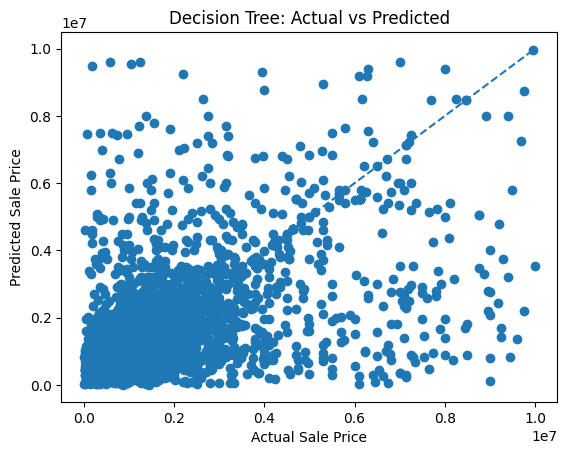

In [28]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


# Decision Tree predictions
y_pred_tree = pipeline.predict(X_test)

# Random Forest predictions
y_pred_rf = rf_pipeline.predict(X_test)

import matplotlib.pyplot as plt

plt.figure()
max_price = max(y_test.max(), y_pred_rf.max())

plt.plot([0, max_price], [0, max_price], linestyle="--")

plt.scatter(y_test, y_pred_tree)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


# Use Searborn for cool plotting:

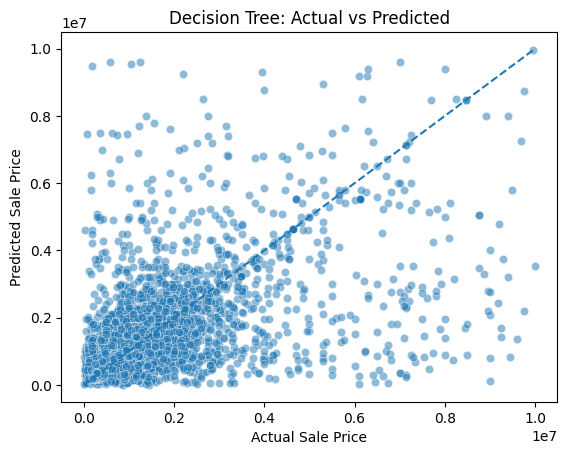

In [29]:
import seaborn as sns
plt.figure()
max_price = max(y_test.max(), y_pred_rf.max())

plt.plot([0, max_price], [0, max_price], linestyle="--")

sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


# 🌲 Random Forest: Actual vs Predicted

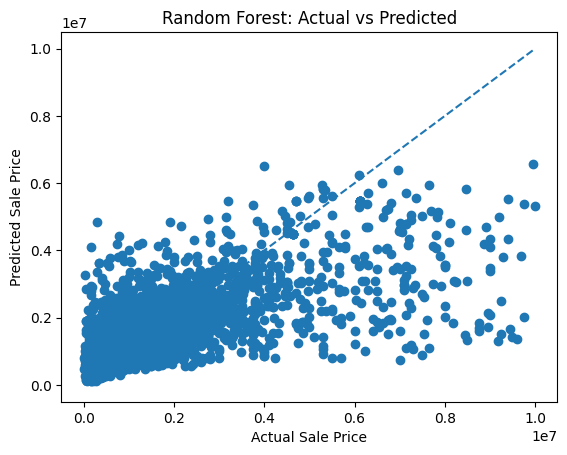

In [27]:
plt.figure()
max_price = max(y_test.max(), y_pred_rf.max())

plt.plot([0, max_price], [0, max_price], linestyle="--")

plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


# 🌳 STEP 2 — Decision Tree (Seaborn plots)


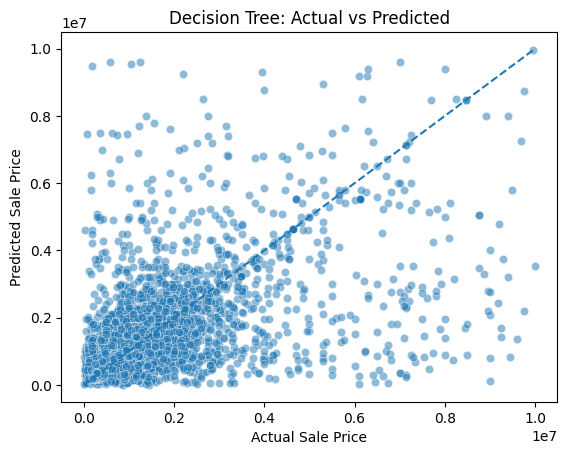

In [26]:
# Actual vs Predicted:
plt.figure()
max_price = max(y_test.max(), y_pred_rf.max())

plt.plot([0, max_price], [0, max_price], linestyle="--")

sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


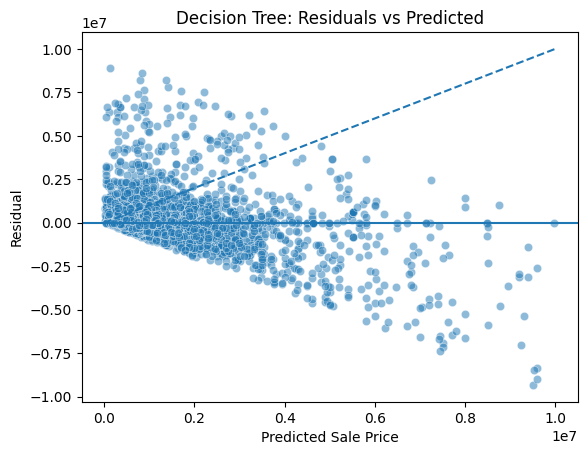

In [25]:
# Residual vs predicted:
residuals_tree = y_test - y_pred_tree

plt.figure()
max_price = max(y_test.max(), y_pred_rf.max())

plt.plot([0, max_price], [0, max_price], linestyle="--")

sns.scatterplot(x=y_pred_tree, y=residuals_tree, alpha=0.5)
plt.axhline(0)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residual")
plt.title("Decision Tree: Residuals vs Predicted")
plt.show()


# 🌲 STEP 3 — Random Forest (Seaborn plots)

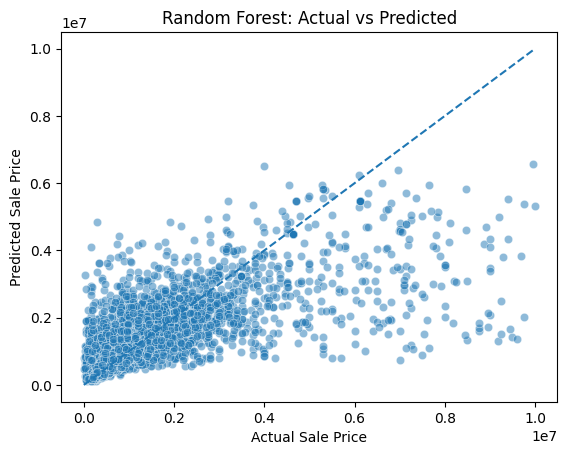

In [24]:
plt.figure()
max_price = max(y_test.max(), y_pred_rf.max())

plt.plot([0, max_price], [0, max_price], linestyle="--")

sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


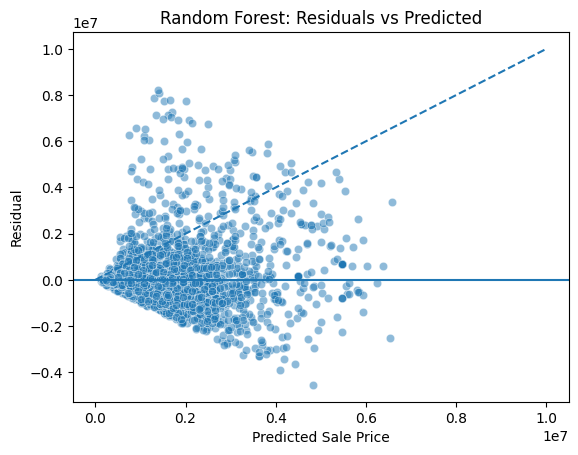

In [23]:
# Residuals vs Predicted (Forest)
residuals_rf = y_test - y_pred_rf

plt.figure()
max_price = max(y_test.max(), y_pred_rf.max())

plt.plot([0, max_price], [0, max_price], linestyle="--")

sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.5)
plt.axhline(0)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residual")
plt.title("Random Forest: Residuals vs Predicted")
plt.show()